In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unemployment-and-mental-illness-survey/Cleaned Data.xlsx
/kaggle/input/unemployment-and-mental-illness-survey/Data_All_190402/READ_ME.txt
/kaggle/input/unemployment-and-mental-illness-survey/Data_All_190402/CSV/Mental Illness Survey 1.csv
/kaggle/input/unemployment-and-mental-illness-survey/Data_All_190402/CSV/CollectorList.csv
/kaggle/input/unemployment-and-mental-illness-survey/Data_All_190402/Excel/CollectorList.xlsx
/kaggle/input/unemployment-and-mental-illness-survey/Data_All_190402/Excel/Mental Illness Survey 1.xlsx
/kaggle/input/unemployment-and-mental-illness-survey/data_all_190402/READ_ME.txt
/kaggle/input/unemployment-and-mental-illness-survey/data_all_190402/CSV/Mental Illness Survey 1.csv
/kaggle/input/unemployment-and-mental-illness-survey/data_all_190402/CSV/CollectorList.csv
/kaggle/input/unemployment-and-mental-illness-survey/data_all_190402/Excel/CollectorList.xlsx
/kaggle/input/unemployment-and-mental-illness-survey/data_all_190402/Excel/Mental Illness S

In [2]:
df=pd.read_excel('/kaggle/input/unemployment-and-mental-illness-survey/Cleaned Data.xlsx')
df.head()

,I am currently employed at least part-time,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,0,0,High School or GED,0,0,0.0,0,1,0,1,...,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,NaN,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


In [4]:
df.rename(columns={'I identify as having a mental illness':'MentallyIll'}, inplace =True)
df.rename(columns={'I am unemployed':'Unemployed'}, inplace =True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    334 non-null    int64  
 1   MentallyIll                                                   334 non-null    int64  
 2   Education                                                     334 non-null    object 
 3   I have my own computer separate from a smart phone            334 non-null    int64  
 4   I have been hospitalized before for my mental illness         334 non-null    int64  
 5   How many days were you hospitalized for your mental illness   297 non-null    float64
 6   I am legally disabled                                         334 non-null    int64  
 7   I have my regular access to the internet                      334 non-n

In [8]:
df = df.replace(to_replace=['No', 'Yes'], value=[0, 1])
df = df.fillna(0)
df = df.iloc[1:]

In [14]:
df.rename(columns={"Annual income (including any social welfare programs) in USD":"Income"},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 2 to 333
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    332 non-null    int64  
 1   MentallyIll                                                   332 non-null    int64  
 2   Education                                                     332 non-null    object 
 3   I have my own computer separate from a smart phone            332 non-null    int64  
 4   I have been hospitalized before for my mental illness         332 non-null    int64  
 5   How many days were you hospitalized for your mental illness   332 non-null    float64
 6   I am legally disabled                                         332 non-null    int64  
 7   I have my regular access to the internet                      332 non-n

In [21]:
df2 = df
df2 = df2.iloc[:, :-3]
df2 = df2.replace(['Lack of concentration','Anxiety', 'Depression', 
                   'Obsessive thinking', 'Panic attacks', 'Compulsive behavior', 
                   'Mood swings', 'Tiredness'], 1)
df2 = df2.replace(to_replace=['Female', 'Male'], value=[0, 1])
df2 = df2.replace(to_replace=['> 60', '45-60', '30-44','18-29'], value=[65, 52, 37, 23])
df2 = df2.replace(to_replace=['Completed Phd', 'Some Phd', 'Completed Masters','Some\xa0Masters', 
                              'Completed Undergraduate', 'Some Undergraduate', 'High School or GED', 'Some highschool']
                              , value=[7, 6, 5, 4, 3, 2, 1, 0])

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 2 to 333
Data columns (total 28 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    332 non-null    int64  
 1   MentallyIll                                                   332 non-null    int64  
 2   Education                                                     332 non-null    int64  
 3   I have my own computer separate from a smart phone            332 non-null    int64  
 4   I have been hospitalized before for my mental illness         332 non-null    int64  
 5   How many days were you hospitalized for your mental illness   332 non-null    float64
 6   I am legally disabled                                         332 non-null    int64  
 7   I have my regular access to the internet                      332 non-n

In [58]:
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.ensemble import RandomForestClassifier

In [39]:
from matplotlib import pyplot as plt

In [59]:
from sklearn.metrics import precision_score

In [30]:
columns=df2.columns
columns=list(columns)
columns.remove("MentallyIll")
X=df2[columns]
y=df2["MentallyIll"]

In [32]:
xtr,xtes,ytr,ytes=train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
model=RandomForestClassifier(max_depth=14,random_state=42)
model.fit(xtr,ytr)
pred = cross_val_predict(model, xtr, ytr, cv=3)

print("Score of the model is:",model.score(xtes,ytes))
print("precision of the model is:",precision_score(ytr,pred))

Score of the model is: 0.8554216867469879
precision of the model is: 0.7796610169491526


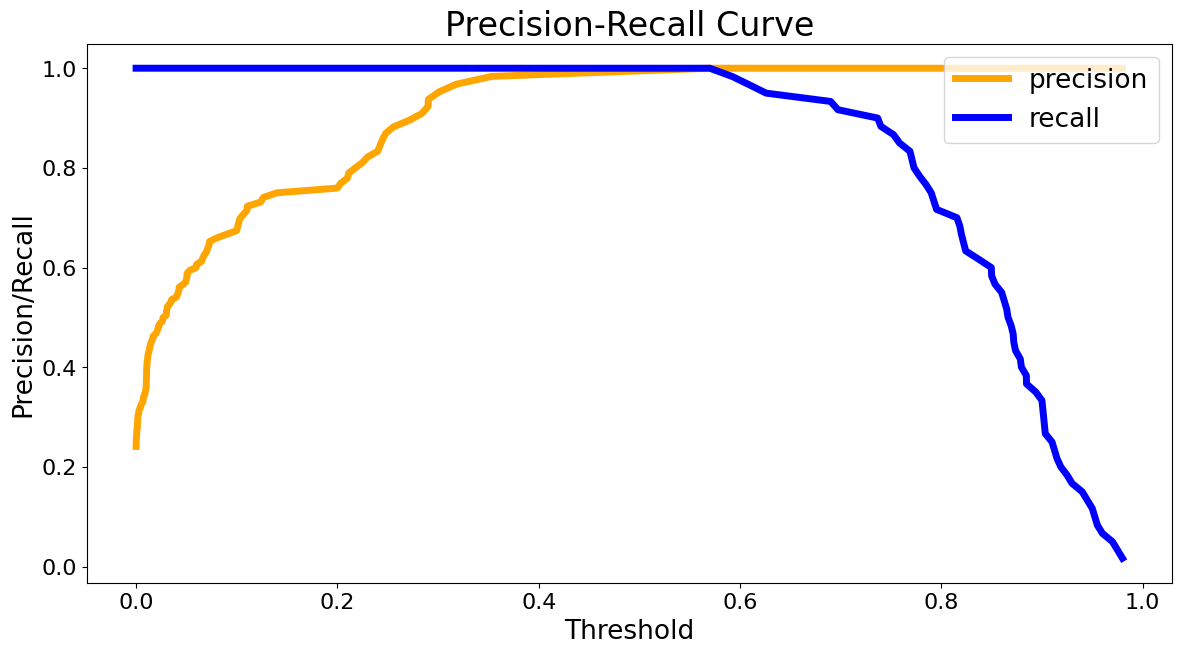

In [41]:
y_scores = model.predict_proba(xtr)
y_scores = y_scores[:,1]
precision, recall, threshold = precision_recall_curve(ytr, y_scores)

plt.figure(figsize=(14, 7))

plt.plot(threshold, precision[:-1], "orange", label="precision", linewidth=5)
plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)

plt.xlabel("Threshold", fontsize=19)
plt.ylabel("Precision/Recall", fontsize=19)
plt.title('Precision-Recall Curve', fontsize=24)

plt.tick_params(labelsize=16)

plt.legend(loc="upper right", fontsize=19)
plt.show()